#Introduction

##MNIST Dataset
MNIST is ‘Modified National Institute of Standards and Technology’. This database consists of handwritten digits from 0 to 9 and it provides a pavement for testing image processing systems.

#1. Importing Dataset

In [ ]:
from keras.datasets import mnist

data = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


#2. Split the Dataset into Training and Testing Data.

In [ ]:
(X_train, y_train), (X_test, y_test) = data

In [ ]:
print(X_train.shape) # 60,000 grayscale images with a size of 28x28
print(y_train.shape) # 60,000 labels for each grayscale images in X_train.
print(X_test.shape) # 10,000 grayscale images with a size of 28x28
print(y_test.shape) # 10,000 labels for each grayscale images in X_test.

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## 2.1. Display an image from the X_train dataset using the matplotlib library.

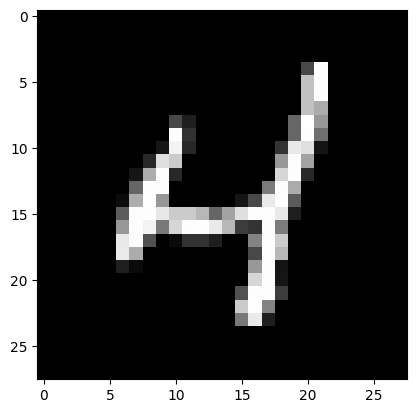

In [ ]:
import matplotlib.pyplot as plt

index = 19564
# print(X_train[index]) # Returns the array of 28x28 index sample(use matplotlib to view image)
# print(y_train[index]) # Returns the label of the index sample

index_image = X_train[index]
plt.imshow(index_image, cmap='gray')
plt.axis('on')
plt.show()

#3. Flatten the images by reshaping them from a 2D array of 28x28 to a 1D array of 784 (28*28).

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


#4. Normalize the training and testing datasets to the range of 0 to 1 for improved model generalization.

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

#5. To align the dataset labels with the network's output layer, preprocess the output data labels from an nx1 format to an nx10 format, where each label represents a class from 0 to 9.

In [ ]:
from tensorflow.keras.utils import to_categorical

print(y_train[index])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]

print(y_train[index])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#6. Model Building

In [ ]:
from keras.models import Sequential, model_from_json
from keras.layers import Dense
from keras.optimizers import Adam

##6.1. Build a neural network with 2 hidden layers and an output layer consisting of 10 neurons.

In [ ]:
model = Sequential()

model.add(Dense(32, input_dim = 28 * 28, activation= 'relu'))

# model.add(Dense(30, activation = 'relu'))

model.add(Dense(num_classes, activation  = 'softmax'))

##6.2 Specify the learning rate, loss function, and optimizer for the neural network.

In [ ]:
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                25120     
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#7. Train the model

In [ ]:
model.fit(X_train, y_train, epochs= 10, batch_size = 100)

Epoch 1/10
600/600 [==============================] - 3s 3ms/step - loss: 0.2912 - accuracy: 0.9125
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1704 - accuracy: 0.9499
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1425 - accuracy: 0.9575
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1262 - accuracy: 0.9627
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1195 - accuracy: 0.9643
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1097 - accuracy: 0.9666
Epoch 7/10
600/600 [==============================] - 3s 6ms/step - loss: 0.1096 - accuracy: 0.9666
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0968 - accuracy: 0.9711
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0973 - accuracy: 0.9703
Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0935 - accuracy: 0.9708

#8. Predicting Accuracy

In [ ]:
scores = model.evaluate(X_test, y_test)
print('Accuracy: ',scores[1] * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1582 - accuracy: 0.9625
Accuracy:  96.24999761581421


#9. Utilize the Model to make Predictions on the Dataset.

In [ ]:
import numpy as np

print(y_test[:5])
# print(X_test[0].shape)
prediction = model.predict(X_test)[:5]

#print(prediction)

for num in range(len(prediction)):
  predicted_class = np.argmax(prediction[num])
  print(predicted_class)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
313/313 [==============================] - 1s 1ms/step
7
2
1
0
4


#10. Save the model architecture and the trained weights.

In [ ]:
def save(model):
    # Save the trained weights
    model.save_weights('model_weights.h5')

    # Save the model architecture
    with open('model_architecture.json', 'w') as f:
        f.write(model.to_json())

    # Save the tokenizer
    # with open('tokenizer.json', 'w') as f:
    #     f.write(tokenizer.to_json())

save(model)

def models():
    # Model reconstruction from JSON file
    with open('model_architecture.json', 'r') as f:
        model = model_from_json(f.read())

    # Load weights into the new model
    model.load_weights('model_weights.h5')

    return model

new_model = models()

# Test saved model

import numpy as np

print(y_test[:5])
print(X_test[0].shape)
prediction = new_model.predict(X_test)[:5]

#print(prediction)

for num in range(len(prediction)):
  predicted_class = np.argmax(prediction[num])
  print(predicted_class)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(784,)
313/313 [==============================] - 1s 1ms/step
7
2
1
0
4


#11. Display a summary of the model's architecture and parameters.

In [ ]:
from keras.models import load_model

loaded_model = load_model('digit_recognizer_ann_model.h5')

# Display the model summary
loaded_model.summary()